In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def opening(image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), dtype='uint8')
    eroded_img = cv.erode(image, kernel)
    dilated_eroded_img = cv.dilate(eroded_img, kernel)
    return dilated_eroded_img


def closing(image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), dtype='uint8')
    dilated_img = cv.dilate(image, kernel)
    eroded_dilated_img = cv.erode(dilated_img, kernel)
    return eroded_dilated_img

def get_neighbors(mat, pixel):    
    pad_image = np.pad(mat, pad_width=((1, 1), (1, 1)), mode='edge')
    local_neighbors = [pixel, (pixel[0]+1, pixel[1]), (pixel[0]+2, pixel[1]),
                 (pixel[0], pixel[1]+1), (pixel[0], pixel[1]+2),
                 (pixel[0]+1, pixel[1]+2), (pixel[0]+2, pixel[1]+1), (pixel[0]+2, pixel[1]+2)]
    final_neighbors = []
    for neighbor in local_neighbors:
        if (0 < neighbor[0] < pad_image.shape[0]-1) and (0 < neighbor[1] < pad_image.shape[1]-1):
            final_neighbors.append((neighbor[0]-1, neighbor[1]-1))
    return final_neighbors

def dfs(mat, index=(0, 0)):
    visited = np.zeros_like(mat)
    visited[index] = 1
    topography_map = [index]
    neighbors = [index]
    while True:
        if len(neighbors) == 0:
            break
        neighbor = neighbors.pop()
        new_neighbors = get_neighbors(mat, neighbor)
        for new_neighbor in new_neighbors:
            if mat[neighbor] == mat[new_neighbor] and visited[new_neighbor] == 0:
                neighbors.append(new_neighbor)
                visited[new_neighbor] = 1
                topography_map.append(new_neighbor)
    return  topography_map

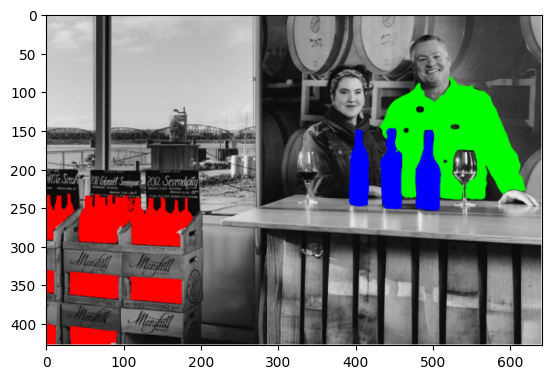

In [3]:
image = cv.imread('q1.png')
plt.imshow(image)
plt.show()

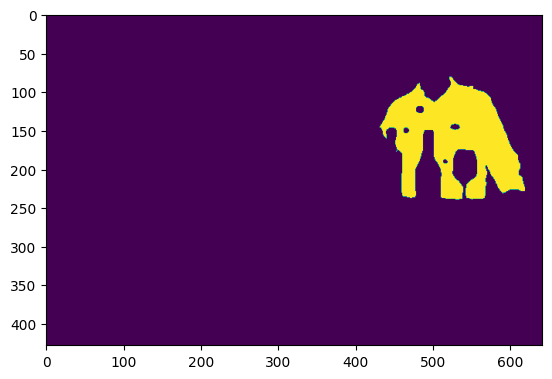

In [4]:
grayImage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
mask = np.zeros_like(grayImage)
for i in range(grayImage.shape[0]):
    for j in range(grayImage.shape[1]):
        if image[i, j, 0] <= 50 and image[i, j, 1] >= 200 and image[i, j, 2] <= 50:
            mask[i, j] = 1

plt.imshow(mask)
plt.savefig('q1res01.jpg')
plt.show()

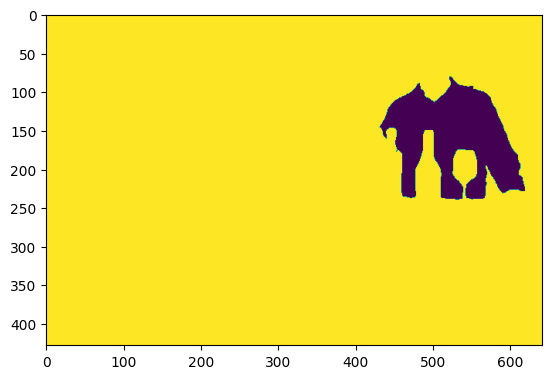

In [5]:
maskBackground = np.zeros_like(mask)
pixels = dfs(mask)
for pixel in pixels:
    maskBackground [pixel[0], pixel[1]] = 1
plt.imshow(maskBackground )
plt.show()

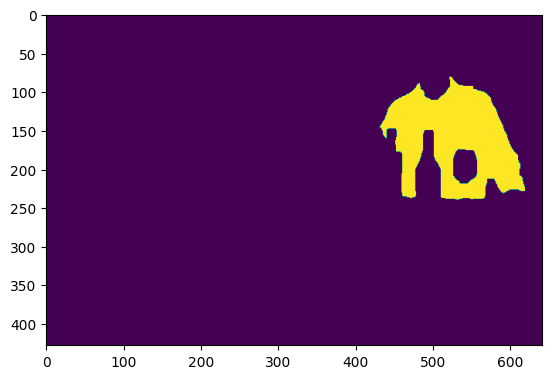

In [6]:
closedImage = closing(mask, kernel_size=9)
plt.imshow(closedImage)
plt.show()

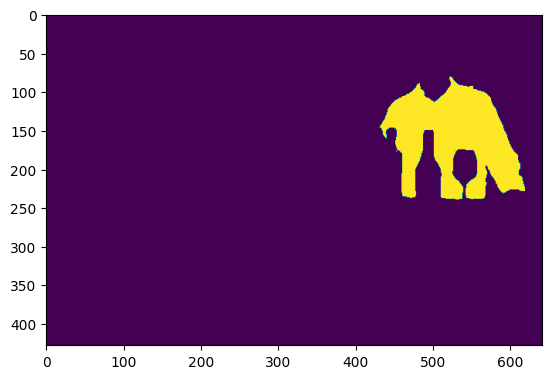

In [7]:
closedImage[maskBackground  == 1] = 0
finalMask = closedImage
plt.imshow(finalMask)
plt.savefig('q1res02.jpg')
plt.show()

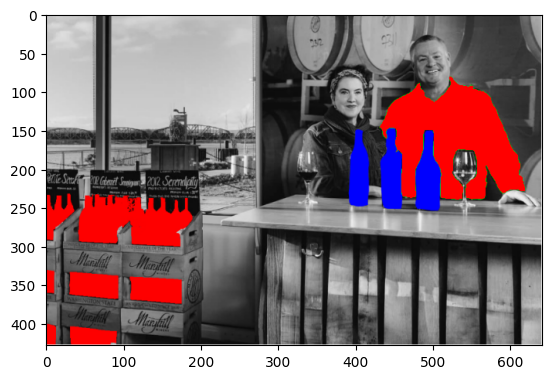

In [8]:
newImage = image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if finalMask[i, j] == 1:
            newImage[i, j, 0] = 255
            newImage[i, j, 1] = 0
            newImage[i, j, 2] = 0

plt.imshow(newImage)
plt.savefig('q1res03.jpg')
plt.show()